This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

The loss has been updated to "sparse_categorical_crossentropy"

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

This is updated from the old book. OK

**"Fitting" the model**

In [15]:
model.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1669 - accuracy: 0.9528
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1611 - accuracy: 0.9543
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1552 - accuracy: 0.9558
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1499 - accuracy: 0.9573
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1447 - accuracy: 0.9594
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1399 - accuracy: 0.9603
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1353 - accuracy: 0.9614
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1308 - accuracy: 0.9627
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1268 - accuracy: 0.9639
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1227 - accuracy: 0.9652

Two quantities are displayed during training: the loss of hte network over the training data, and the accuracy of the network over the training data.

**Using the model to make predictions**

In [16]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.0280573e-06, 1.6999667e-10, 6.4154585e-05, 1.3238934e-03,
       4.4877349e-10, 7.9636993e-06, 2.3674793e-13, 9.9853134e-01,
       2.7257756e-06, 6.6933957e-05], dtype=float32)

In [17]:
predictions[0].argmax()

7

In [18]:
predictions[0][7]

0.99853134

In [19]:
test_labels[0]

7

In [20]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print(f"train_acc: {train_acc}")

1875/1875 [==============================] - 1s 546us/step - loss: 0.1032 - accuracy: 0.9705
train_acc: 0.9705166816711426


**Evaluating the model on new data**

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 808us/step - loss: 0.1185 - accuracy: 0.9657
test_acc: 0.9656999707221985


This gap between training accuracy and test accuracy is an example of _overfitting_: the fact that machine-learning models tend to perform worse on new data than on their training data. 

## Data representations for neural networks

You may be already familiar with matrices, which are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a _dimension_ is often called an _axis_).



### Scalars (rank-0 tensors)

In [22]:
import numpy as np
x = np.array(12)
x

array(12)

In [23]:
x.ndim

0

The number of axes of a tensor is also called its _rank_.

### Vectors (rank-1 tensors)

In [24]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [25]:
x.ndim

1

This vector has five entries and so is called a _5-dimensional vector_. Don't confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has fice axes (and may have any number of dimensions along each axis). _Dimensionality_ can denote either the number of entries along a specific axes (as in teh case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. In the latter case, it's technically more correct to talk about a _tensor of rank 5_ (the rank of a tensor being the number of axes), but the ambiguous notation of _5D tensor_ is common regardless.

### Matrices (rank-2 tensors)

An array of vectors is a _matrix_, or 2D tensor. A matrix has two axes (often referred to as _rows_ and _columns_). You can visually interpret a matrix as a rectangular grid of numbers. This is a Numpy matrix:

In [26]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

The entries from the first axis are called the _rows_, and the entries from the second axis are called the _columns_. In the prevoius example, 

```python
[5, 78, 2, 34, 0]
```

is the first row of x, and 
```python
[5,6,7]
```

is the first column.

### Rank-3 tensors and higher-rank tensors

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. Following is a Numpy 3D tensor.

In [27]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you'll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

### Key attributes

In [28]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
train_images.ndim

3

In [30]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

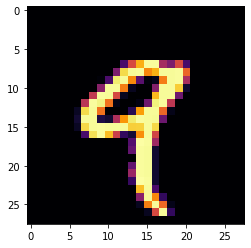

In [35]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.inferno)
plt.show()

In [36]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [37]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [41]:
train_images[0, 14:, 14:]

array([[240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,
          0],
       [ 46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,
          0],
       [229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,
          0],
       [253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

In [42]:
my_slice = train_images[:, 14:, 14:]

In [43]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you'll come across in deep learning will be the _samples axis_ (sometimes called the _samples dimension_). In the MNIST example, samples are images of digits.

In addition, deep-learning models don't process an entire dataset at once; rather, they break the data into small batches. Concretely, here's one batch of our MNIST digits, with batch size 128:

In [44]:
batch = train_images[:128]

and here's the next batch:

In [45]:
batch = train_images[128:256]

And the nth batch:

In [46]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

When considering such a batch tensor, the first axis (axis 0) is called the _batch axis_ or _batch dimension_. This is a term you'll frequently encoutner when using Keras and other deep-learning libraries.

### Real-world examples of data tensors

* Vector data - 2D tensors of shape (samples, features)
* Timeseries data or sequence data - 3D tensors of shape (samples, timesteps, features)
* Video - 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

### Vector data


This is the most common case. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of vectors), where the first axis is the _samples axis_ and the second axis the _features_ axis.



### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample ca be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor.

The time axis is always the second axis (axis of index 1), by convention. 



### Image data

### Video data

## The gears of neural networks: tensor operations

Much as any computer program can be ultimately reduced to a small set of binary operations on binary iputs (AND, OR, NOR, and so on), all transformations learned by deep neural networks can be reduced to a handful of _tensor operations_ applied to tensors of numeric data. For instance, it's possible to add tensors, multiply tensors, and so on.

In our initial example, we were building our network by stacking Dense layers on top of each other. A Keras layer instance looks like this:

```python
keras.layers.Dense(512, activation='relu')
```

This layer can be interpreted as a function, which takes as input a 2D tensor and returns another 2D tensor - a new representation for the input tensor. Specifically, the function is as follows (where W is a 2D tensor and b is a vector, both attributes of the layer):

```python
output = relu(dot(W, input) + b)
```

Let's unpack this. We have three tensor operations here: a dot product (dot) between the input tensor and a tensor named W; an addition (+) between the resulting 2D tensor and a vector b; and finally a relu operation. relu(x) is max(x, 0).

Although this section deals entirely with linear algebra expressions, you won't find any mathematical notation here. I've found that mathematical concepts can be more readily mastered by programmers with no mathematical background if they're expresed as short Python snippets instead of mathematical euqations. So we'll use Numpy code throughout.

### Element-wise operations

The **relu** operation and addition are _element-wise_ operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations (_vectorized_ implementations, a term that comes from the _vector processor_ supercommputer architecture from the 1970-1990 period). If you want to write a naive Python implementation of an element-wise operation, you use a **for** loop, as in this naive implementation of an element-wise **relu** opeation:

In [48]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

You do the same for addition:

In [49]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [50]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [51]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.91 s


### Broadcasting

Our earlier naive implementation of naive_add only supports the addition of 2D tensors with identical shapes. But in the Dense layer introduced earlier, we added a 2D tensor with a vector. What happens with addition when the shapes of the two tensors being added differ?

When possible, and if there's no ambiguity, the smaller tensor will be _broadcasted_ to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

Let's look at a concrete example. Consider X with shape (32,10) and y with shape (10, ). First, we add an empty first axis to y, whose shape becomes (1, 10)/ Then we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where
```python
Y[i, :] == y
```
for i in 
```python
range(0, 32)
```

At this point, we can proceed to add X and Y, because they have the same shape.

In [52]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [53]:
y

array([0.29430522, 0.28516679, 0.16228156, 0.99105487, 0.13030246,
       0.56480593, 0.74829852, 0.99381202, 0.60415384, 0.42957129])

In [54]:
y = np.expand_dims(y, axis=0)

In [55]:
y

array([[0.29430522, 0.28516679, 0.16228156, 0.99105487, 0.13030246,
        0.56480593, 0.74829852, 0.99381202, 0.60415384, 0.42957129]])

In [56]:
Y = np.concatenate([y] * 32, axis=0)

In [61]:
X[-1]

array([0.83067704, 0.66785921, 0.32035837, 0.4680324 , 0.01641645,
       0.74826095, 0.47051644, 0.12088354, 0.98879543, 0.65224367])

In [62]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [63]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [65]:
z.shape

(64, 3, 32, 10)

### Tensor product

In [66]:
x = np.random.random((3,))
y = np.random.random((3,))
z = np.dot(x, y)

In [67]:
x

array([0.48806017, 0.89603293, 0.84048134])

In [68]:
y

array([0.77587915, 0.83861595, 0.20949495])

In [69]:
z

1.3061798116815306

In [70]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [71]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [72]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [73]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

A third type of tensor operation that's essential to understand is _tensor reshaping_. Although it wasn't used in the Dense layers in our first neural network example, we used it when we preprocessed the digits data before feeding it into our network.

In [74]:
train_images = train_images.reshape((60000, 28 * 28))

Reshaping a tensor means rearranging its rows and columns to match a target shape. Naturally, the reshaped tensor has the same number of coefficients as the initial tensor. Reshaping is best understood via simple examples:

In [75]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [76]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [77]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

Because the contents of the tensors manipulated by tensor operations can be interpreted as coordinates of points in some geometric space, all tensor operations have a geometric interpretation. For instance, let's consider addition. We'll start with the following vector

In [78]:
A = np.array([0.5, 1])
A.shape

(2,)

Let's consider a new point

```python
B = np.array([1, 0.25])
```

In [79]:
B = np.array([1, 0.25])

In [80]:
C = A + B
C

array([1.5 , 1.25])

### A geometric interpretation of deep learning

You just learned that neural networks consist entirely of chains of tensor operations and that all of these tensor operations are just geometric transformations of the input data. It follows that you can interpret a neural netowrk as a very complex geometric transformation in a high-dimensional space, implemented via a long series of simple steps.

In 3D, the following mental image may prove useful. Imagine two sheets of colored paper: one red and one blue. Put one on top of the other. Now crumple them together into a small ball. That crumpled paper ball is your input data, and each sheet of paper is a class of data in a classification problem. What a neural network (or any other machine-learning model) is meant to do is figure out a transformation of the paper ball that would uncrumple it, so as to make the two classes cleanly separable again. With deep learning, this would be implemented as a series of simple transformations of the 3D space, such as those you could apply on the paper ball with your fingers, one movement at a time.


Uncrumpling paper balls is what machine learning is about: finding neat representations for complex, highly folded data manifolds. At this point, you should have a pretty good intuition as to why deep learning excels at this: it takes the approach of incrementally decomposing a complicated geometric transformation into a long chain of elementary ones, which is pretty much the strategy a human would follow to uncrumple a paper ball. Each layer in a deep network applies a transformation that disentangles the data a little—and a deep stack of layers makes tractable an extremely complicated disentanglement process.



## The engine of neural networks: gradient-based optimization

As you saw in the previous section, each neural layer from our first network example transforms its input data as follows:

```
output = relu(dot(W, input) + b)
```

In this expression, W and b are tensors that are attributes of the layer. They're called the _weights_ or _trainable parameters_ of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the network from exposure to training data.

Initially, these weight matrices are filled with small random values (a step called random initialization). Of course, there’s no reason to expect that relu(dot(W, input) + b), when W and b are random, will yield any useful representations. The resulting representations are meaningless—but they’re a starting point. What comes next is to gradually adjust these weights, based on a feedback signal. This gradual adjustment, also called training, is basically the learning that machine learning is all about.





### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: the Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

In [82]:
28*28

784

#### The Gradient Tape in TensorFlow

In [94]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x**3 + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [95]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [96]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x**6 + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [97]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.00680612, 0.5060401 ],
       [1.5308207 , 0.04306304]], dtype=float32)>

In [99]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [100]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [101]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [102]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [103]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2524 - accuracy: 0.9275
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1025 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0678 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0370 - accuracy: 0.9888


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, model.weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Chapter summary